In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv(
    "../output/responses_combined/07_combined_responses.csv",
    index_col=0
    )

In [39]:
df.columns

Index(['study_id', 'study_name', 'scenario_id', 'scenario_code', 'story_id',
       'chat_id', 'story_common_id', 'story_category', 'story_name',
       'story_content',
       ...
       'choices_0_logprobs_content_0_top_logprobs_7_bytes',
       'choices_0_logprobs_content_0_top_logprobs_19_bytes',
       'choices_0_logprobs_content_0_top_logprobs_16_bytes',
       'choices_0_logprobs_content_0_top_logprobs_15_bytes',
       'choices_0_logprobs_content_0_top_logprobs_9_bytes',
       'choices_0_logprobs_content_0_top_logprobs_2_bytes',
       'choices_0_logprobs_content_0_top_logprobs_11_bytes',
       'choices_0_logprobs_content_0_top_logprobs_17_bytes',
       'choices_0_logprobs_content_0_top_logprobs_3_bytes',
       'custom_question_language_category'],
      dtype='object', length=106)

In [40]:
question_options = df["question_options"].str.split(", ")

In [41]:
question_options

0                         [popcorn, chocolate]
1                         [popcorn, chocolate]
2            [popcorn, chocolate, uncertainty]
3                         [popcorn, chocolate]
4                         [popcorn, chocolate]
                         ...                  
5415                             [Evet, Hayır]
5416    [parkta, okulda, alışveriş merkezinde]
5417    [parkta, okulda, alışveriş merkezinde]
5418           [park, okul, alışveriş merkezi]
5419    [parkta, okulda, alışveriş merkezinde]
Name: question_options, Length: 5420, dtype: object

In [42]:
df["correct_answer_option"] = df.apply(
    lambda row: row["question_options"].split(", ").index(row["answer_correct"]) + 1 if row["answer_correct"] in row["question_options"].split(", ") else None, axis=1
    )

In [44]:
top_logprob_pairs = [
    (column, column.replace("token", "logprob"))
    for column in df.columns
    if "top_logprobs" in column and column.endswith("_token")
    ]

In [45]:
pivots = []
for token_col, logprob_col in top_logprob_pairs:
    token_df = df.pivot_table(
        index=df.index,
        columns=token_col,
        values=logprob_col
        )
    
    token_df.columns = [f"{col}_logprob" for col in token_df.columns]
    pivots.append(token_df)

In [46]:
pd.concat(pivots, axis=1)

,1_logprob,2_logprob,3_logprob,\n_logprob,_logprob,**_logprob,1_logprob,2_logprob,3_logprob,Can_logprob,...,ş_logprob,​_logprob,​​_logprob,‌_logprob,₁_logprob,₂_logprob,﻿_logprob,１_logprob,２_logprob,３_logprob
0,NaN,-0.000010,NaN,NaN,NaN,-12.655360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.000008,NaN,NaN,NaN,-12.800564,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.017309,NaN,NaN,NaN,NaN,-4.066542,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.000001,NaN,NaN,NaN,NaN,-14.143191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.000318,NaN,NaN,NaN,NaN,NaN,NaN,-8.056562,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,NaN,-0.001307,NaN,NaN,NaN,NaN,-6.640765,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5416,NaN,NaN,-0.000002,NaN,NaN,NaN,-13.244788,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5417,NaN,-0.004523,NaN,NaN,NaN,NaN,-5.486777,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5418,NaN,-0.000061,NaN,NaN,NaN,NaN,NaN,NaN,-9.719673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
logprobs_df = pd.concat(pivots, axis=1)

In [48]:
logprobs_df = logprobs_df.T.groupby(level=0).max().T

In [49]:
logprobs_df.columns

Index(['_logprob', '_logprob', '_logprob', '_logprob', '\t_logprob',
       '\n\n_logprob', '\n   \n_logprob', '\n_logprob', ' \n_logprob',
       '  \n_logprob',
       ...
       '​_logprob', '​​_logprob', '‌_logprob', '₁_logprob', '₂_logprob',
       '三_logprob', '﻿_logprob', '１_logprob', '２_logprob', '３_logprob'],
      dtype='object', length=268)

In [50]:
logprobs_df.head(3)

,_logprob,_logprob,_logprob,_logprob,\t_logprob,\n\n_logprob,\n \n_logprob,\n_logprob,\n_logprob,\n_logprob,...,​_logprob,​​_logprob,‌_logprob,₁_logprob,₂_logprob,三_logprob,﻿_logprob,１_logprob,２_logprob,３_logprob
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.246694,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.894503,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.150143,NaN,NaN,...,-18.604092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.358675,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.911661,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.756456


In [51]:
#and int(col.split('_')[0]) > 0 and int(col.split('_')[0]) <= 4

In [52]:
filtered_columns = [
    col
    for col
    in logprobs_df.columns
    if col.endswith('_logprob') and col.split('_')[0].isdigit()
    ]

In [53]:
logprobs_df[filtered_columns]

,02_logprob,0_logprob,10_logprob,11_logprob,123_logprob,12_logprob,1_logprob,20_logprob,21_logprob,222_logprob,...,6_logprob,7_logprob,8_logprob,9_logprob,¹_logprob,₁_logprob,₂_logprob,１_logprob,２_logprob,３_logprob
0,NaN,NaN,NaN,NaN,NaN,NaN,-15.096189,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.894503,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,-12.938471,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.358675,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,-10.741690,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.756456
3,NaN,-21.549717,NaN,NaN,NaN,NaN,-0.000001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-20.748426,NaN,-18.657312,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.000318,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-19.305166,NaN,-18.144320,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,NaN,NaN,NaN,NaN,NaN,NaN,-6.640765,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5416,NaN,NaN,NaN,NaN,NaN,NaN,-13.244788,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.500309
5417,NaN,NaN,NaN,NaN,NaN,NaN,-5.486777,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.504362,NaN
5418,NaN,NaN,NaN,NaN,NaN,NaN,-14.303230,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.012250,NaN


In [54]:
concat_df = pd.concat([df, logprobs_df[filtered_columns]], axis=1)

In [55]:
concat_df["logprob_correct"] = concat_df.apply(
    lambda row: row[str(int(row["correct_answer_option"])) + "_logprob"] if pd.notnull(row["correct_answer_option"]) else None, axis=1)

In [56]:
gby = concat_df.groupby(
    ["study_id", "story_common_id", "question_common_id", "model", "custom_question_language_category"]
    )["logprob_correct"]

In [58]:
gby_mean = gby.mean()

In [59]:
pivot = gby_mean.reset_index().pivot_table(
    index=["study_id", "story_common_id", "question_common_id"],
    columns=["custom_question_language_category", "model"]
)

Modify below study_id to 1, 2, or 3 to get the desired answers. Call the method .to_clipboard() to copy the results into your clipboard.

In [62]:
np.exp(pivot.query("study_id == 3")).round(2)

logprob_correct  \
custom_question_language_category                      English   
model                                       gpt-3.5-turbo-0125   
study_id story_common_id question_common_id                      
3        3A              9                                0.00   
                         11                               0.52   
                         12                               0.64   
                         13                               1.00   
                         14                               0.98   
         3B              15                               0.98   
                         17                               0.45   
                         18                               0.77   
                         19                               0.60   
         4A              21                               0.00   
                         23                               0.43   
                         24                               0.99   
                         25                               1.00   
                         26                               0.03   
                         27                               0.01   
                         28                               0.01   
         4B              29                               0.00   
                         31                               0.40   
                         32                               0.90   
                         33                               0.28   
                         34                               0.02   
                         35                               0.17   

                                                                    \
custom_question_language_category                                    
model                                       gpt-4-turbo-2024-04-09   
study_id story_common_id question_common_id                          
3        3A              9                                    1.00   
                         11                                   0.00   
                         12                                   1.00   
                         13                                   1.00   
                         14                                   1.00   
         3B              15                                   0.98   
                         17                                   0.00   
                         18                                   1.00   
                         19                                   1.00   
         4A              21                                   0.00   
                         23                                   1.00   
                         24                                   1.00   
                         25                                   1.00   
                         26                                   1.00   
                         27                                   0.90   
                         28                                   1.00   
         4B              29                                   0.00   
                         31                                   1.00   
                         32                                   1.00   
                         33                                   1.00   
                         34                                   0.98   
                         35                                   0.00   

                                                                \
custom_question_language_category                      Turkish   
model                                       gpt-3.5-turbo-0125   
study_id story_common_id question_common_id                      
3        3A              9                                0.07   
                         11                               0.11   
                         12                               0.54   
                         13                    

In [71]:
analysis = concat_df.groupby(
    ["study_id",
     "model",
     "custom_question_language_category",
     "story_id",
     "question_id",
     "question_content",
     "question_options",
     "answer_correct",
     "correct_answer_option"
     ])[["1_logprob", "2_logprob", "3_logprob", "logprob_correct"]].mean()

In [72]:
analysis

1_logprob  \
study_id model                  custom_question_language_category story_id question_id question_content                                   question_options                     answer_correct correct_answer_option              
1        gpt-3.5-turbo-0125     English                           1-EN     1_EN        She believes that the bag is full of {RESPONSE}.   popcorn, chocolate                   chocolate      2.0                    -1.985468   
                                                                           2_EN        She is delighted to have found this bag. She lo... popcorn, chocolate                   chocolate      2.0                    -2.836042   
                                                                  1A-EN    1_EN        She believes that the bag is full of {RESPONSE}.   popcorn, chocolate                   popcorn        1.0                    -2.023107   
                                                                           2_EN        She is delighted to have found this bag. She lo... popcorn, chocolate                   popcorn        1.0                    -0.790239   
                                                                  1B-EN    1_EN/1B     She believes that the bag is full of {RESPONSE}.   popcorn, chocolate, uncertainty      uncertainty    3.0                    -3.795179   
...                                                                                                                                                                                                                        ...   
3        gpt-4-turbo-2024-04-09 Turkish-zan                       4A-TR    26_TR-2     Nihal turtanın {CEVAP} içinde olduğunu zannediyor. dolabın, sepetin, çekmecenin         sepetin        2.0                    -2.215195   
                                                                           28_TR-2     Burak turtanın {CEVAP} içinde olduğunu zannediyor. dolabın, sepetin, çekmecenin         sepetin        2.0                    -6.512914   
                                                                  4B-TR    29_TR-2     Can, Gamzenin balon almak için {CEVAP} gittiğin... parka, okula, alışveriş merkezine    parka          1.0                    -7.052372   
                                                                           33_TR-2     Gamze baloncunun {CEVAP} olduğunu zannediyor.      parkta, okulda, alışveriş merkezinde okulda         2.0                    -6.867151   
                                                                           35_TR-2     Can baloncunun {CEVAP} olduğunu zannediyor.        parkta, okulda, alışveriş merkezinde okulda         2.0                    -0.246434   

                                                                                                                                                                                                                     2_logprob  \
study_id model                  custom_question_language_category story_id question_id question_content                                   question_options                     answer_correct correct_answer_option              
1        gpt-3.5-turbo-0125     English                           1-EN     1_EN        She believes that the bag is full of {RESPONSE}.   popcorn, chocolate                   chocolate      2.0                    -0.194094   
                                                                           2_EN        She is delighted to have found this bag. She lo... popcorn, chocolate                   chocolate      2.0                    -0.109846   
                                                                  1A-EN    1_EN        She believes that the bag is full of {RESPONSE}.   popcorn, chocolate                   popcorn        1.0                    -0.332537   
                                                                           2_EN        She is delighted to have found this bag. She lo... popcor

Below is the legacy code for the first iteration of this study.

In [ ]:
def produce_analysis_frame(
        df: pd.DataFrame
        ) -> tuple[list[pd.DataFrame], dict[str, dict[int, str]]]:
    
    analysis_columns = [
        "initial_order",
        "initial_index",
        "session_id",
        "story_category",
        "story_id",
        "story_common_id",
        "question_id",
        "question_common_id",
        "story_language",
        "language_category",
        "model",
        "question_tom_type",
        "content",
        "is_correct",
        "has_correct_reasoning",
        "is_beyond_scope"
    ]
    
    label_encoding_columns = [
        "story_category",
        "story_common_id",
        "story_language",
        "language_category",
        "model",
        "question_tom_type"
    ]
    
    label_encoding_codes = dict(
        df[label_encoding_columns].apply(lambda column: dict(
            enumerate(
                column.astype("category").cat.categories
                )
            )
        )
    )

    analysis_df = df.loc[:, analysis_columns]

    analysis_df.loc[:, label_encoding_columns] = analysis_df[label_encoding_columns] \
            .apply(lambda column: column.astype("category").cat.codes)
    
    analysis_df.loc[:, ["is_correct", "has_correct_reasoning", "is_beyond_scope"]] = analysis_df[["is_correct", "has_correct_reasoning", "is_beyond_scope"]].astype("Int64")

    studies = []
    
    for study_id in [1, 2, 3]:
        study_df = analysis_df.loc[df["study_id"] == study_id]
        studies.append(study_df)

    return (studies, label_encoding_codes)

In [ ]:
studies, label_codes = produce_analysis_frame(df)

KeyError: "['language_category'] not in index"

In [ ]:
studies[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   initial_order          1200 non-null   int64  
 1   initial_index          1200 non-null   int64  
 2   session_id             1200 non-null   int64  
 3   story_category         1200 non-null   object 
 4   story_id               1200 non-null   object 
 5   story_common_id        1200 non-null   object 
 6   question_id            1200 non-null   object 
 7   question_common_id     1200 non-null   float64
 8   story_language         1200 non-null   object 
 9   language_category      1200 non-null   object 
 10  model                  1200 non-null   object 
 11  question_tom_type      1200 non-null   object 
 12  content                1200 non-null   object 
 13  is_correct             1200 non-null   Int64  
 14  has_correct_reasoning  112 non-null    object 
 15  is_beyond

In [ ]:
studies[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 1200 to 4399
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   initial_order          3200 non-null   int64  
 1   initial_index          3200 non-null   int64  
 2   session_id             3200 non-null   int64  
 3   story_category         3200 non-null   object 
 4   story_id               3200 non-null   object 
 5   story_common_id        3200 non-null   object 
 6   question_id            3200 non-null   object 
 7   question_common_id     3200 non-null   float64
 8   story_language         3200 non-null   object 
 9   language_category      3200 non-null   object 
 10  model                  3200 non-null   object 
 11  question_tom_type      3200 non-null   object 
 12  content                3200 non-null   object 
 13  is_correct             3200 non-null   Int64  
 14  has_correct_reasoning  907 non-null    object 
 15  is_bey

In [ ]:
studies[2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 4400 to 6559
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   initial_order          2160 non-null   int64  
 1   initial_index          2160 non-null   int64  
 2   session_id             2160 non-null   int64  
 3   story_category         2160 non-null   object 
 4   story_id               2160 non-null   object 
 5   story_common_id        2160 non-null   object 
 6   question_id            2160 non-null   object 
 7   question_common_id     2160 non-null   float64
 8   story_language         2160 non-null   object 
 9   language_category      2160 non-null   object 
 10  model                  2160 non-null   object 
 11  question_tom_type      2160 non-null   object 
 12  content                2160 non-null   object 
 13  is_correct             2160 non-null   Int64  
 14  has_correct_reasoning  872 non-null    object 
 15  is_bey

In [ ]:
label_codes

{'story_category': {0: 'Unexpected Contents', 1: 'Unexpected Transfer'},
 'story_common_id': {0: '1',
  1: '1A',
  2: '1B',
  3: '1C',
  4: '1D',
  5: '2',
  6: '2A',
  7: '2B',
  8: '2C',
  9: '2D',
  10: '3A',
  11: '3B',
  12: '4A',
  13: '4B'},
 'story_language': {0: 'English', 1: 'Turkish'},
 'language_category': {0: 'English',
  1: 'Turkish',
  2: 'Turkish-san',
  3: 'Turkish-zan'},
 'model': {0: 'gpt-3.5-turbo-0613', 1: 'gpt-4-1106-preview'},
 'question_tom_type': {0: 'Action',
  1: 'Belief',
  2: 'Explanation',
  3: 'Knowledge',
  4: 'Reality',
  5: 'Thought'}}

In [ ]:
with pd.ExcelWriter(path="studies_analysis.xlsx", engine="xlsxwriter") as writer:
    for study_num, study_df in enumerate(studies):
        exp_only = study_df.loc[study_df["question_tom_type"] == 2]
        non_exp_only = study_df.loc[study_df["question_tom_type"] != 2]
        non_exp_has_reasoning_only = study_df.loc[(study_df["question_tom_type"] != 2) & (~(study_df["has_correct_reasoning"].isna()) | (study_df["is_beyond_scope"] != 0))]

        if not study_df.empty:
            study_df.to_excel(writer, sheet_name=f"study_{study_num + 1}_all")
        
        if not exp_only.empty:
            exp_only.to_excel(writer, sheet_name=f"study_{study_num + 1}_open")
        
        if not non_exp_only.empty:
            non_exp_only.to_excel(writer, sheet_name=f"study_{study_num + 1}_closed")

        if not non_exp_has_reasoning_only.empty:
            non_exp_has_reasoning_only.to_excel(writer, sheet_name=f"study_{study_num + 1}_closed_reasoning")

In [ ]:
def calculate_groupby_results(
        df: pd.DataFrame,
        fixed_group_columns: list[str],
        other_group_columns: list[str | tuple[str]],
        target_columns: list[str],
        calculation: str
        ):
    
    results = []

    group_by_object = df.groupby(fixed_group_columns)
    gbo_target_columns = group_by_object[target_columns]
    result_df = gbo_target_columns.agg(calculation)
    results.append(result_df)
    
    for item in other_group_columns:
        group_by_columns = fixed_group_columns.copy()
        if isinstance(item, str):
            group_by_columns.append(item)
        if isinstance(item, tuple):
            group_by_columns.extend(item)
    
        group_by_object = df.groupby(group_by_columns)
        gbo_target_columns = group_by_object[target_columns]
        result_df = gbo_target_columns.agg(calculation)
        results.append(result_df)
    
    return results

In [ ]:
study_tables: list[list[pd.DataFrame]] = []
for study_id in [1, 2, 3]:
    tables = calculate_groupby_results(
        df=df[(df["study_id"] == study_id) & (~df["story_common_id"].isin(["1", "2"]))],
        fixed_group_columns=["language_category", "model"],
        other_group_columns=[
            "story_common_id",
            ("story_common_id", "question_tom_type"),
            ("story_common_id", "question_tom_type", "question_tom_order"),
            ("story_common_id", "question_common_id"),
            "question_common_id", 
            "question_tom_order",
            "question_tom_type",
            ("question_tom_order", "question_tom_type")
        ],
        target_columns=["is_correct", "has_correct_reasoning", "is_beyond_scope"],
        calculation=["mean", "size", "count"]
    )
    study_tables.append(tables)

In [ ]:
def get_manuscript_table(table: pd.DataFrame, language: str):
    tom_type_suffixes = {
        "English": "",
        "Turkish": "",
        "Turkish-san": "-san",
        "Turkish-zan": "-zan"
    }

    lang_cols = []

    if language == "Turkish":
        lang_cols = ["Turkish", "Turkish-san", "Turkish-zan"]
    else:
        lang_cols = ["English"]

    turkish_table = table.loc[lang_cols]

    turkish_table_reset = turkish_table.reset_index()

    turkish_table_reset["question_tom_type"] = (
        turkish_table_reset["question_tom_type"] + turkish_table_reset["language_category"] \
                                                .map(tom_type_suffixes)
    )


    turkish_table_indexed = turkish_table_reset \
                            .drop(columns="language_category") \
                            .set_index(["model",
                                        "story_common_id",
                                        "question_tom_type",
                                        "question_tom_order"
                                        ]
                            )
    
    turkish_table_indexed = turkish_table_indexed.sort_index()

    pivot = turkish_table_indexed.pivot_table(
        index=["story_common_id", "question_tom_type", "question_tom_order"],
        columns=["model"],
        values=["is_correct", "has_correct_reasoning", "is_beyond_scope"]
        ).sort_index(axis=1, level=[0, 1, 2], ascending=[False, True, True])


    return pivot

In [ ]:
with pd.ExcelWriter(f"studies_frequencies.xlsx", engine="xlsxwriter") as writer:
    for num in [0, 1, 2]:
        tmp_tbl = study_tables[num][3]

        exp_only = tmp_tbl.loc[tmp_tbl.index.get_level_values(3) == "Explanation"]
        non_exp_only = tmp_tbl.loc[tmp_tbl.index.get_level_values(3) != "Explanation"]
        non_exp_has_reasoning_only = tmp_tbl.loc[(tmp_tbl.index.get_level_values(3) != "Explanation") & ((tmp_tbl["has_correct_reasoning", "count"] != 0) | (tmp_tbl["is_beyond_scope", "mean"] != 0))]

        if not tmp_tbl.empty:
            tmp_tbl.to_excel(writer, sheet_name=f"study_{num + 1}_all")
        
        if not exp_only.empty:
            exp_only.to_excel(writer, sheet_name=f"study_{num + 1}_open")
        
        if not non_exp_only.empty:
            non_exp_only.to_excel(writer, sheet_name=f"study_{num + 1}_closed")

        if not non_exp_has_reasoning_only.empty:
            non_exp_has_reasoning_only.to_excel(writer, sheet_name=f"study_{num + 1}_closed_reasoning")

In [ ]:
with pd.ExcelWriter(f"studies_tom_types.xlsx", engine="xlsxwriter") as writer:
    for num in [0, 1, 2]:
        tmp_tbl = study_tables[num][7]

        tmp_tbl.to_excel(writer, sheet_name=f"study_{num + 1}_tom")

In [ ]:
tbl = study_tables[0][7]

In [ ]:
tbl

is_correct             \
                                                             mean size count   
language_category model              question_tom_type                         
English           gpt-3.5-turbo-0613 Action                0.2750   80    80   
                                     Belief                0.0000   40    40   
                                     Thought               0.0000   40    40   
                  gpt-4-1106-preview Action                0.0750   80    80   
                                     Belief                0.6750   40    40   
                                     Thought               0.0500   40    40   
Turkish           gpt-3.5-turbo-0613 Action                0.3875   80    80   
                                     Belief                0.0000   40    40   
                                     Thought               0.2500   40    40   
                  gpt-4-1106-preview Action                0.4000   80    80   
                                     Belief                0.7500   40    40   
                                     Thought               0.2000   40    40   
Turkish-san       gpt-3.5-turbo-0613 Belief                0.0000   40    40   
                                     Thought               0.5000   40    40   
                  gpt-4-1106-preview Belief                0.4000   40    40   
                                     Thought               0.0000   40    40   
Turkish-zan       gpt-3.5-turbo-0613 Belief                0.0000   40    40   
                                     Thought               0.5000   40    40   
                  gpt-4-1106-preview Belief                0.5500   40    40   
                                     Thought               0.2500   40    40   

                                                       has_correct_reasoning  \
                                                                        mean   
language_category model              question_tom_type                         
English           gpt-3.5-turbo-0613 Action                              0.0   
                                     Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Action                         0.208333   
                                     Belief                              1.0   
                                     Thought                        0.714286   
Turkish           gpt-3.5-turbo-0613 Action                              NaN   
                                     Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Action                              NaN   
                                     Belief                              1.0   
                                     Thought                             0.5   
Turkish-san       gpt-3.5-turbo-0613 Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Belief                              1.0   
                                     Thought                             NaN   
Turkish-zan       gpt-3.5-turbo-0613 Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Belief                              1.0   
                                     Thought                             1.0   

                                                                   \
                                                       size count   
language_category model              question_tom_type              
English           gpt-3.5-turbo-0613 Action              80    20   
                                     Belief              40     0   
                            

In [ ]:
man_tbl = get_manuscript_table(tbl, "English")

/var/folders/p2/t6k98qgn57z3fr404d196dvm0000gn/T/ipykernel_10034/1029757040.py:27: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  .drop(columns="language_category") \


KeyError: "None of ['story_common_id', 'question_tom_order'] are in the columns"

In [ ]:
man_tbl.head()

is_correct  \
                                                                  count   
model                                                gpt-3.5-turbo-0613   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

                                                                         \
                                                                          
model                                                gpt-4-1106-preview   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

                                                                         \
                                                                   mean   
model                                                gpt-3.5-turbo-0613   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                               0.0   
                Belief            1.0                               1.0   
1A              Action            1.0                               1.0   
                Belief            1.0                               0.0   
1B              Action            1.0                               0.0   

                                                                         \
                                                                          
model                                                gpt-4-1106-preview   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                               1.0   
                Belief            1.0                               1.0   
1A              Action            1.0                               0.3   
                Belief            1.0                               0.0   
1B              Action            1.0                               0.0   

                                                                         \
                                                                   size   
model                                                gpt-3.5-turbo-0613   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

                                                                         \
                                                                          
model                                                gpt-4-1106-preview   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

     

In [ ]:
man_tbl.to_excel("study_1.xlsx")

In [ ]:
df.query("(study_id == 2) and (question_tom_type == 'Explanation') and (story_common_id == '1A')").groupby(["language_category", "model"])["has_correct_reasoning"].mean()

language_category  model             
English            gpt-3.5-turbo-0613    0.0
                   gpt-4-1106-preview    0.0
Turkish            gpt-3.5-turbo-0613    0.0
                   gpt-4-1106-preview    0.3
Turkish-san        gpt-3.5-turbo-0613    0.8
                   gpt-4-1106-preview    0.0
Turkish-zan        gpt-3.5-turbo-0613    0.0
                   gpt-4-1106-preview    0.0
Name: has_correct_reasoning, dtype: object

In [ ]:
df.groupby(["study_id", "story_language"])["question_tom_type"].value_counts()

study_id  story_language  question_tom_type
1         English         Action               200
                          Belief               100
                          Thought              100
          Turkish         Thought              300
                          Belief               300
                          Action               200
2         English         Action               200
                          Reality              200
                          Explanation          200
                          Thought              100
                          Belief               100
          Turkish         Reality              600
                          Action               600
                          Explanation          600
                          Thought              300
                          Belief               300
3         English         Belief               120
                          Thought              120
                          Knowledge   

In [ ]:
df["language_category"].value_counts()

language_category
Turkish        3180
English        1740
Turkish-zan     820
Turkish-san     820
Name: count, dtype: int64

In [ ]:
(df["question_tom_type"] == "Explanation")

In [ ]:
df[(df["study_id"] == 1)].groupby("language_category")["is_correct"].value_counts().round(2)

language_category  is_correct
English            False         273
                   True          127
Turkish            False         219
                   True          181
Turkish-san        False         124
                   True           76
Turkish-zan        False         108
                   True           92
Name: count, dtype: int64

In [ ]:
df[(df["study_id"] == 2) & (df["question_tom_type"] == "Explanation") & (df["story_common_id"].isin(["2", "2A", "2B", "2C", "2D"]) & (df["language_category"] == "Turkish"))]["question_common_id"].value_counts()

question_common_id
7.0    300
Name: count, dtype: int64

In [ ]:
df[df["study_id"] == 2]

,initial_order,initial_index,session_id,study_id,study_name,scenario_id,scenario_code,story_id,chat_id,story_common_id,...,content,role,function_call,tool_calls,language_category,is_correct,has_correct_reasoning,is_beyond_scope,has_grammatical_error,needs_debating
1200,729,3946,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,Sam believes that the bag is full of chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
1201,730,3947,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,She loves eating chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
1202,731,3948,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,Sam thinks that the bag is full of chocolate b...,assistant,NaN,NaN,English,True,True,False,False,False
1203,732,3949,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,She can clearly see that it is full of popcorn.,assistant,NaN,NaN,English,True,NaN,False,False,False
1204,899,4116,239,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,chocolate,assistant,NaN,NaN,English,True,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,6351,3993,2227,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,Kedi kutunun içinden zıplar.,assistant,NaN,NaN,Turkish,True,NaN,False,False,False
4396,6422,4081,2248,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,Mehmet kedinin kutunun içinde olduğunu sanıyor.,assistant,NaN,NaN,Turkish-san,True,NaN,False,False,False
4397,6423,4082,2248,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,Mehmet kediyi kutunun içinde arayacak.,assistant,NaN,NaN,Turkish,True,NaN,False,False,False
4398,6424,4083,2248,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,"Mehmet, Can'ın kediyi sepete koyduğunu düşüner...",assistant,NaN,NaN,Turkish,False,False,False,True,False


<Axes: xlabel='language_category'>

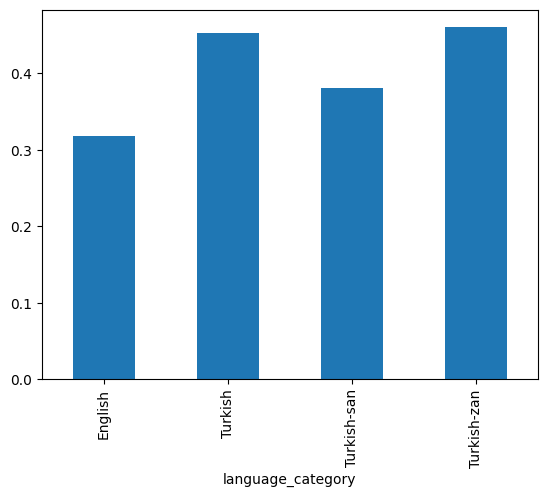

In [ ]:
df[df["study_id"] == 1].groupby("language_category")["is_correct"].mean().plot.bar()